## Preprocessing

In [7]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load data
df = pd.read_csv('Iris.csv',index_col=0)

# Select useful features

features_df = df[['SepalLengthCm','PetalLengthCm']]  

print('Data size:')
print(features_df.shape)

# Select K
K = 5
features_df

Data size:
(150, 2)


,SepalLengthCm,PetalLengthCm
Id,,
1,5.1,1.4
2,4.9,1.4
3,4.7,1.3
4,4.6,1.5
5,5.0,1.4
...,...,...
146,6.7,5.2
147,6.3,5.0
148,6.5,5.2


## Standardizing the data

In [8]:
scaler = MinMaxScaler()
standard = scaler.fit(features_df)
standard_df = pd.DataFrame(standard.transform(features_df))
X = standard_df.values.reshape(-1,2)
X



array([[0.22222222, 0.06779661],
       [0.16666667, 0.06779661],
       [0.11111111, 0.05084746],
       [0.08333333, 0.08474576],
       [0.19444444, 0.06779661],
       [0.30555556, 0.11864407],
       [0.08333333, 0.06779661],
       [0.19444444, 0.08474576],
       [0.02777778, 0.06779661],
       [0.16666667, 0.08474576],
       [0.30555556, 0.08474576],
       [0.13888889, 0.10169492],
       [0.13888889, 0.06779661],
       [0.        , 0.01694915],
       [0.41666667, 0.03389831],
       [0.38888889, 0.08474576],
       [0.30555556, 0.05084746],
       [0.22222222, 0.06779661],
       [0.38888889, 0.11864407],
       [0.22222222, 0.08474576],
       [0.30555556, 0.11864407],
       [0.22222222, 0.08474576],
       [0.08333333, 0.        ],
       [0.22222222, 0.11864407],
       [0.13888889, 0.15254237],
       [0.19444444, 0.10169492],
       [0.19444444, 0.10169492],
       [0.25      , 0.08474576],
       [0.25      , 0.06779661],
       [0.11111111, 0.10169492],
       [0.

## Dendrograms for different linkage methods and metrics:

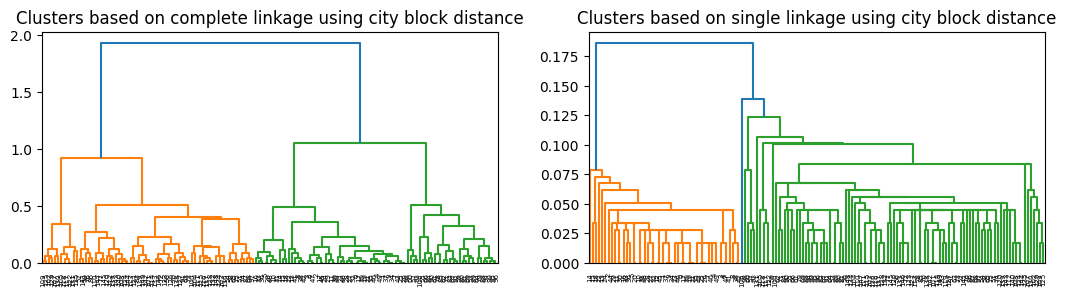

In [56]:
# Plot dendrograms using city block distance and complete/single linkages.
plt.figure(figsize=[20,3])

linkage_types = ['complete', 'single']

for i, l in enumerate(linkage_types):
    plt.subplot(1, 3, i+1)
    plt.title('Clusters based on {} linkage using city block distance'.format(l))
    dend = dendrogram(linkage(X, method= l, metric='cityblock'))  





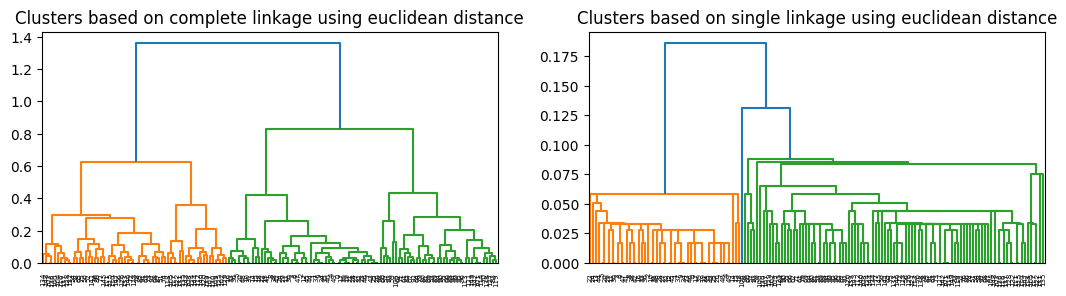

In [57]:
# Plot dendrograms using euclidean distance and complete/single linkages.
plt.figure(figsize=[20,3])

linkage_types = ['complete', 'single']

for i, l in enumerate(linkage_types):
    plt.subplot(1, 3, i+1)
    plt.title('Clusters based on {} linkage using euclidean distance'.format(l))
    dend = dendrogram(linkage(X, method= l, metric='euclidean'))  



The chosen linkage for analyses is complete and distance metric is city block.
The most obvious distinct clusters seems to be the 4 clusters, as these clustes are the most dissimilar.

Text(0, 0.5, 'Petal Length')

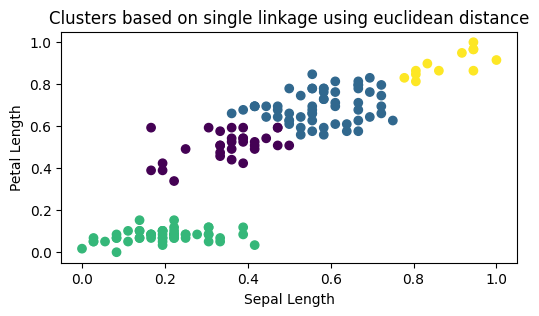

In [63]:
# Assigning agglomerative clustering for chosen number of clusters 4.
plt.figure(figsize=[20,3])

plt.subplot(1, 3, 3)

cluster = AgglomerativeClustering(n_clusters=4, metric='cityblock', linkage='complete')
cluster.fit_predict(X)

ax = plt.scatter(X[:,0], X[:,1], c=cluster.labels_)

plt.title('Clusters based on {} linkage using euclidean distance'.format(l))
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')



In [66]:
# Silhouette score for dataset using cityblock metric.
score = round(silhouette_score(X, cluster.labels_, metric='cityblock'), 2)
score

0.56

This score is closer to 1 than 0, and thus it is not a great score, indicating that there is some overlapping between the clusters an the clusters are not well defined. Perhaps if more larger cluster number was chosen, there would be more distinct clusters.
